Connected to robotics-in-agriculture-research (Python 3.12.11)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
DATA_PATH = "data/raw/crop_yield.csv"

In [ ]:
df = pd.read_csv(DATA_PATH)
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667
19688,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1356.2,22778368.48,74196.64,1.261818


In [ ]:
df.shape

(19689, 10)

In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  str    
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  str    
 3   State            19689 non-null  str    
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), str(3)
memory usage: 1.5 MB


In [ ]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

<ipython-input-9-ea512a94d72d>:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object"]).columns.tolist()


In [ ]:
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['Crop', 'Season', 'State']
Numerical columns: ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']


In [ ]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.0,2.009128e+03,6.498099e+00,1997.00,2004.00,2010.00,2.015000e+03,2.020000e+03
Area,19689.0,1.799266e+05,7.328287e+05,0.50,1390.00,9317.00,7.511200e+04,5.080810e+07
Production,19689.0,1.643594e+07,2.630568e+08,0.00,1393.00,13804.00,1.227180e+05,6.326000e+09
Annual_Rainfall,19689.0,1.437755e+03,8.169096e+02,301.30,940.70,1247.60,1.643700e+03,6.552700e+03
Fertilizer,19689.0,2.410331e+07,9.494600e+07,54.17,188014.62,1234957.44,1.000385e+07,4.835407e+09
Pesticide,19689.0,4.884835e+04,2.132874e+05,0.09,356.70,2421.90,2.004170e+04,1.575051e+07
Yield,19689.0,7.995401e+01,8.783062e+02,0.00,0.60,1.03,2.388889e+00,2.110500e+04


In [ ]:
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for Crop:
Crop
Rice                     1197
Maize                     975
Moong(Green Gram)         740
Urad                      733
Groundnut                 725
Sesamum                   685
Potato                    628
Sugarcane                 605
Wheat                     545
Rapeseed &Mustard         528
Bajra                     524
Jowar                     513
Arhar/Tur                 508
Ragi                      498
Gram                      490
Small millets             485
Cotton(lint)              476
Onion                     454
Sunflower                 441
Dry chillies              419
Other Kharif pulses       382
Horse-gram                371
Peas & beans (Pulses)     369
Tobacco                   364
Other  Rabi pulses        355
Soyabean                  349
Turmeric                  337
Masoor                    324
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    297
Sweet potato

In [ ]:
for col in cat_cols:
    print(f"Value counts for {col}:")
    # print(df[col].value_counts())
    print(df[col].unique())
    print("\n")

Value counts for Crop:
<StringArray>
[             'Arecanut',             'Arhar/Tur',           'Castor seed',
              'Coconut ',          'Cotton(lint)',          'Dry chillies',
                  'Gram',                  'Jute',               'Linseed',
                 'Maize',                 'Mesta',            'Niger seed',
                 'Onion',    'Other  Rabi pulses',                'Potato',
     'Rapeseed &Mustard',                  'Rice',               'Sesamum',
         'Small millets',             'Sugarcane',          'Sweet potato',
               'Tapioca',               'Tobacco',              'Turmeric',
                 'Wheat',                 'Bajra',          'Black pepper',
              'Cardamom',             'Coriander',                'Garlic',
                'Ginger',             'Groundnut',            'Horse-gram',
                 'Jowar',                  'Ragi',             'Cashewnut',
                'Banana',              'Soyabean', 

In [ ]:
for col in cat_cols:
    print(f"Value counts for {col}:")
    # print(df[col].value_counts())
    print(df[col].unique())
    print(df[col].nunique())
    print("\n")

Value counts for Crop:
<StringArray>
[             'Arecanut',             'Arhar/Tur',           'Castor seed',
              'Coconut ',          'Cotton(lint)',          'Dry chillies',
                  'Gram',                  'Jute',               'Linseed',
                 'Maize',                 'Mesta',            'Niger seed',
                 'Onion',    'Other  Rabi pulses',                'Potato',
     'Rapeseed &Mustard',                  'Rice',               'Sesamum',
         'Small millets',             'Sugarcane',          'Sweet potato',
               'Tapioca',               'Tobacco',              'Turmeric',
                 'Wheat',                 'Bajra',          'Black pepper',
              'Cardamom',             'Coriander',                'Garlic',
                'Ginger',             'Groundnut',            'Horse-gram',
                 'Jowar',                  'Ragi',             'Cashewnut',
                'Banana',              'Soyabean', 

In [ ]:
for col in cat_cols:
    print(f"Value counts for {col}:")
    # print(df[col].value_counts())
    # print(df[col].unique())
    print(df[col].nunique())
    print("\n")

Value counts for Crop:
55


Value counts for Season:
6


Value counts for State:
30




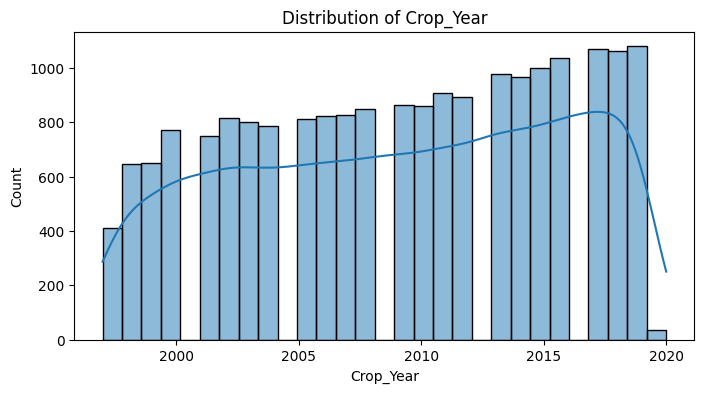

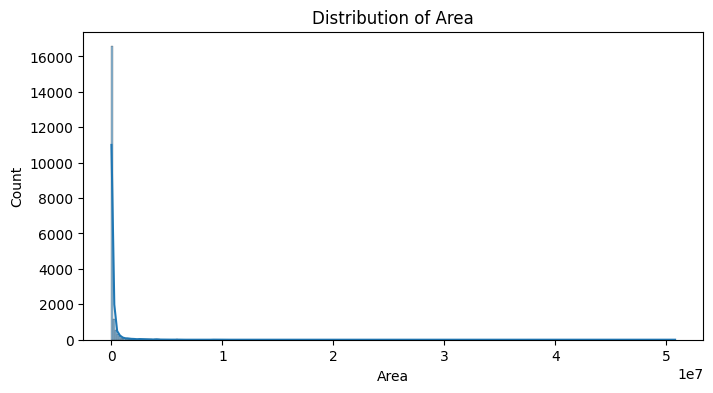

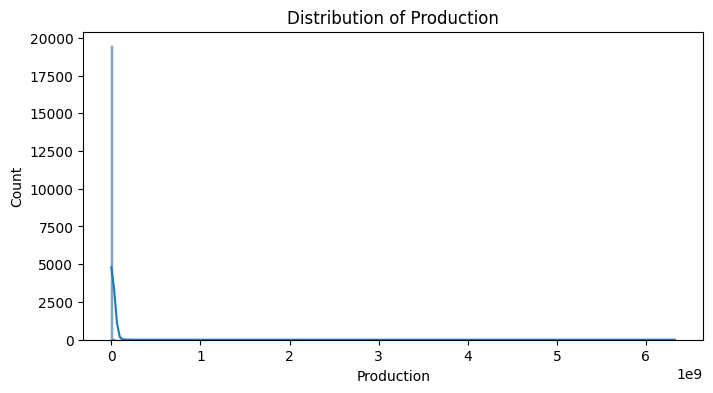

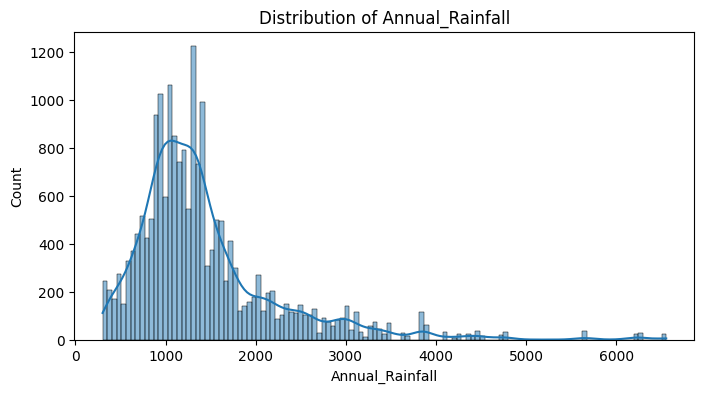

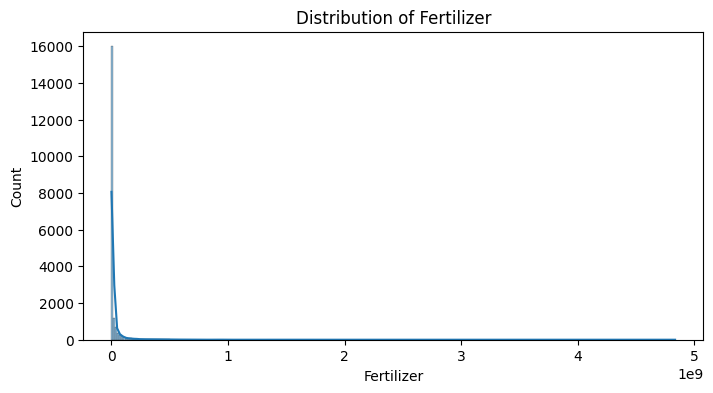

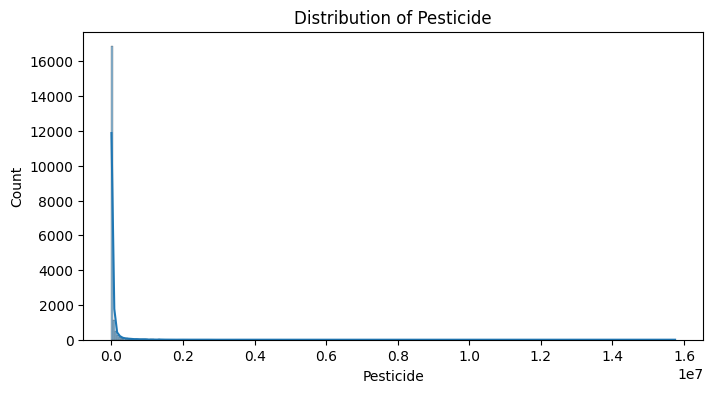

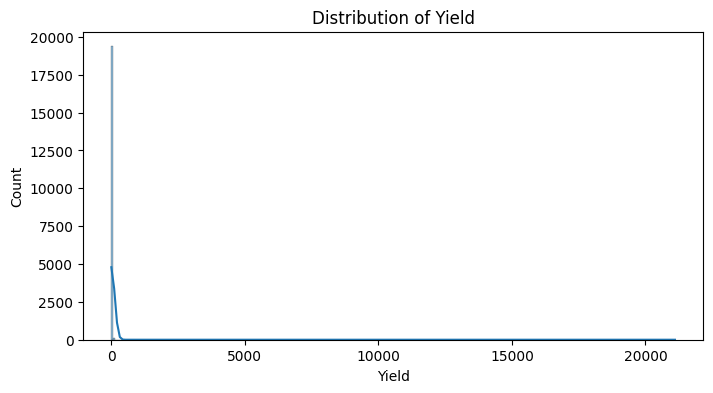

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

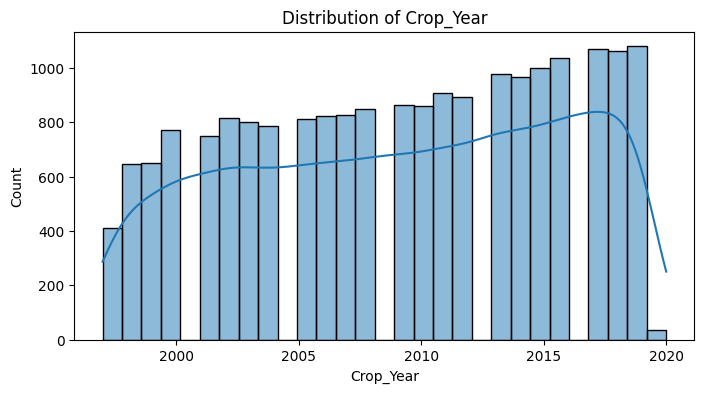

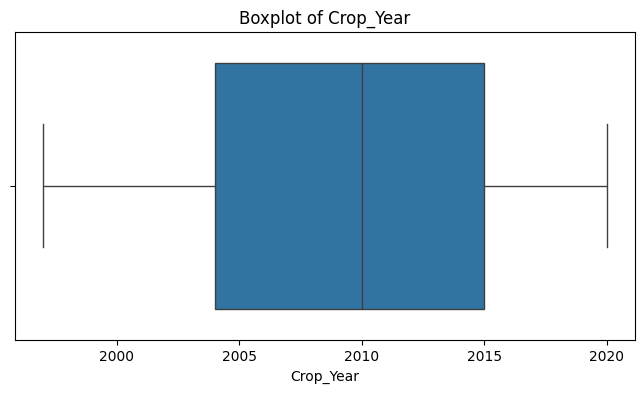

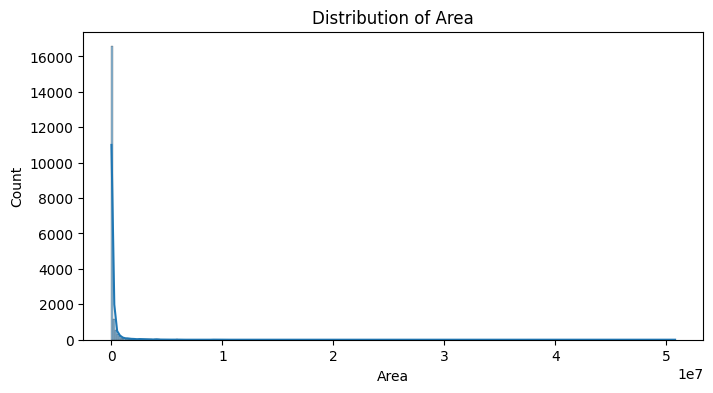

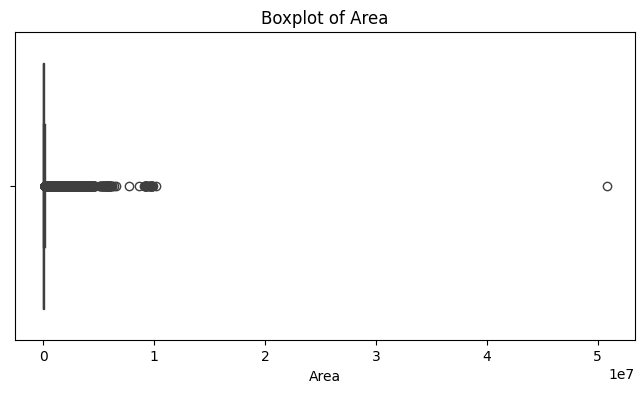

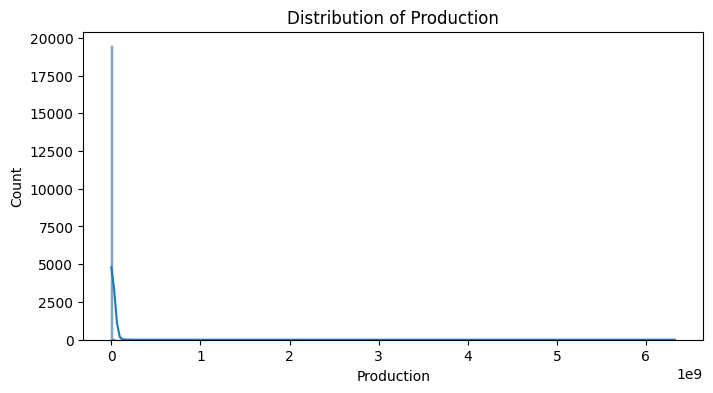

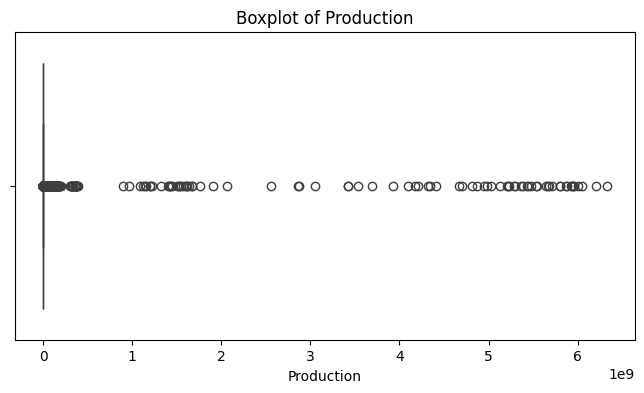

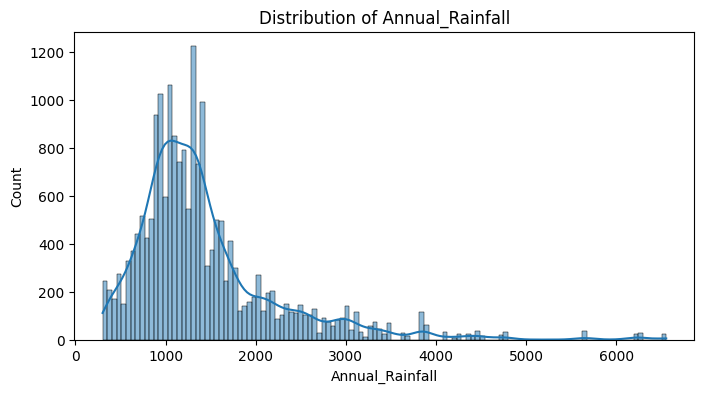

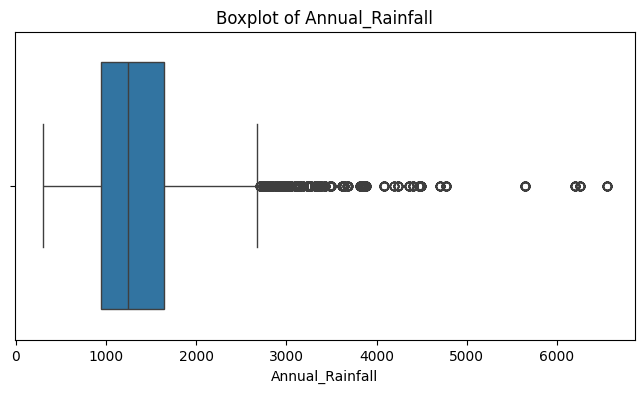

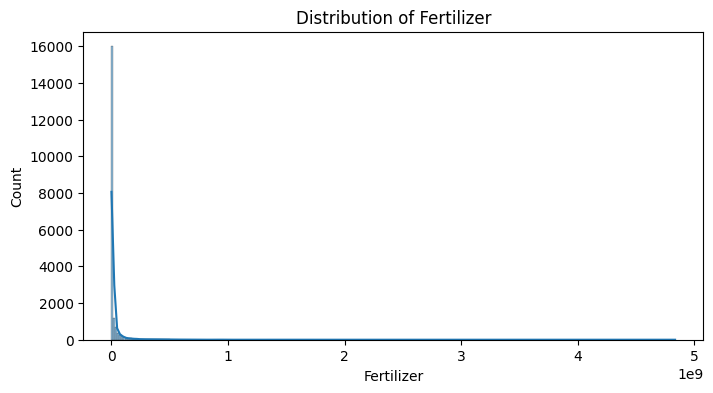

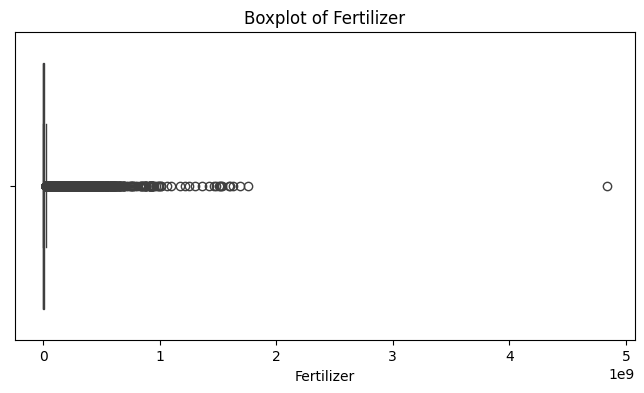

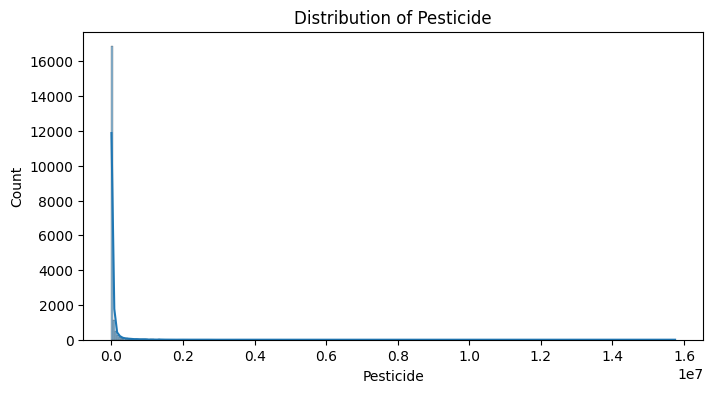

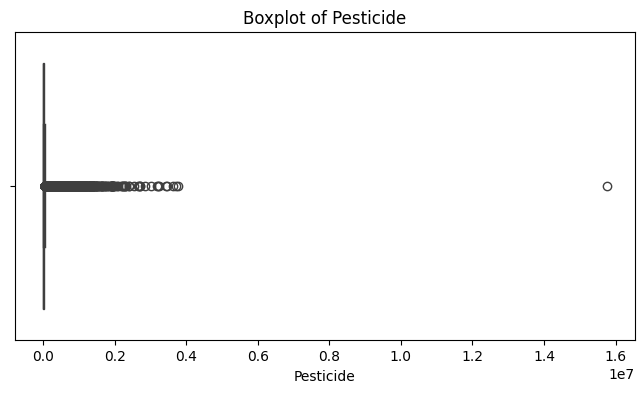

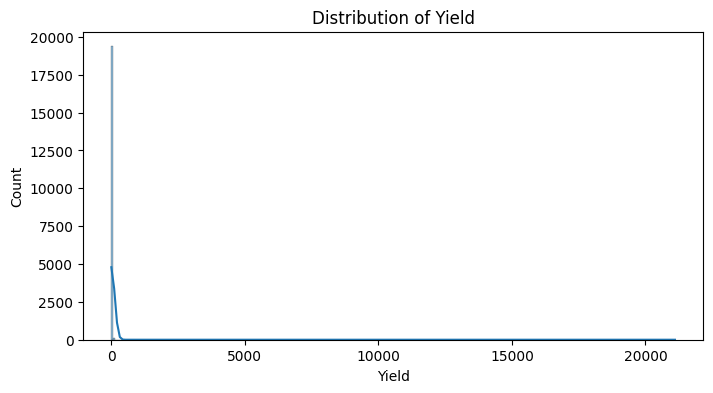

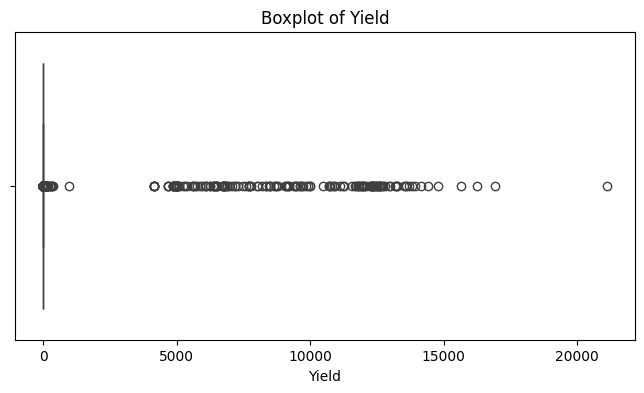

In [ ]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

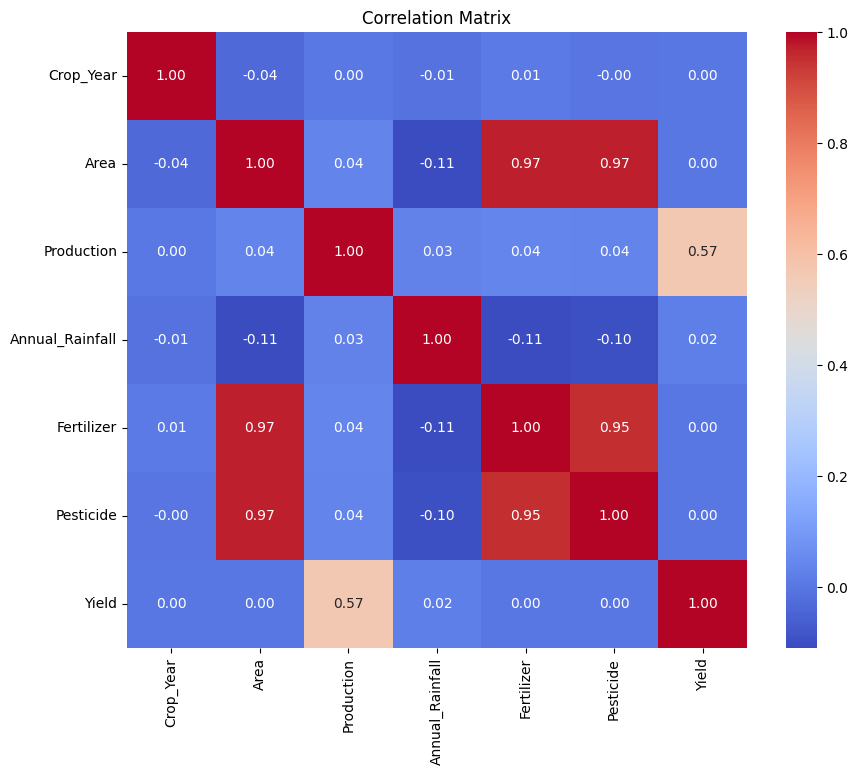

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
num_cols.remove("Production")

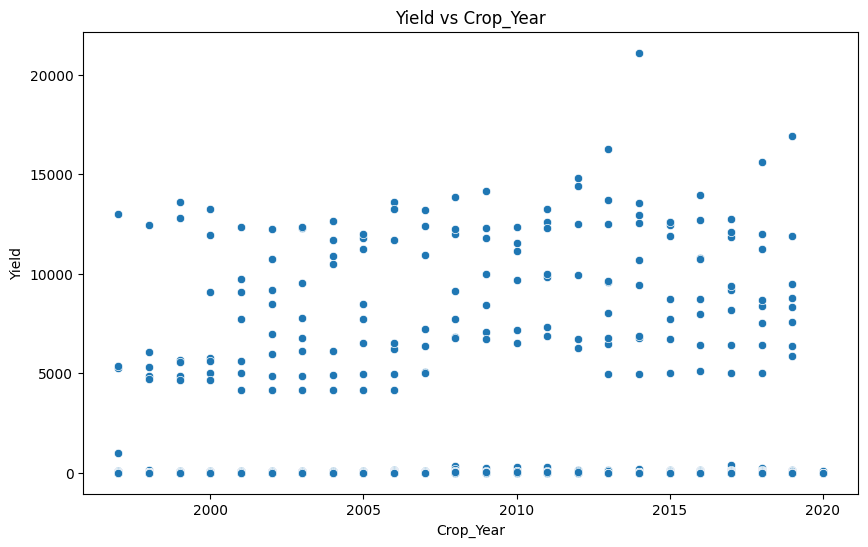

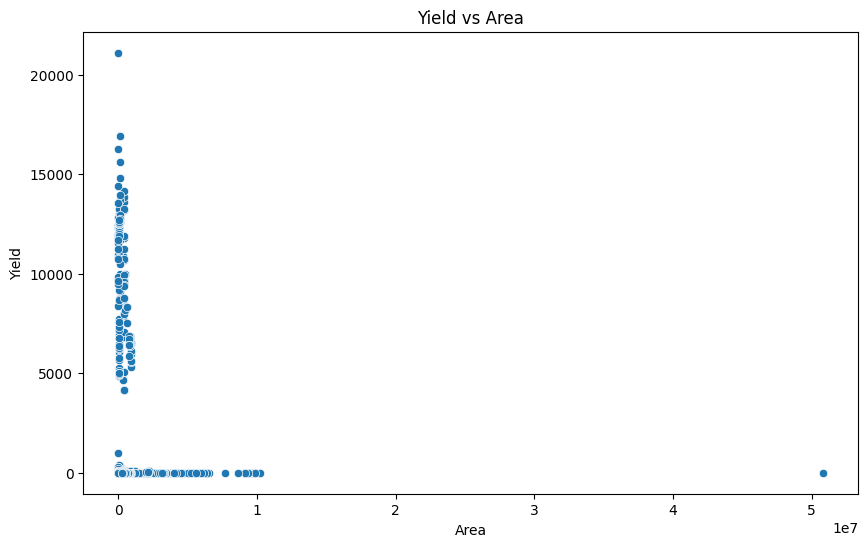

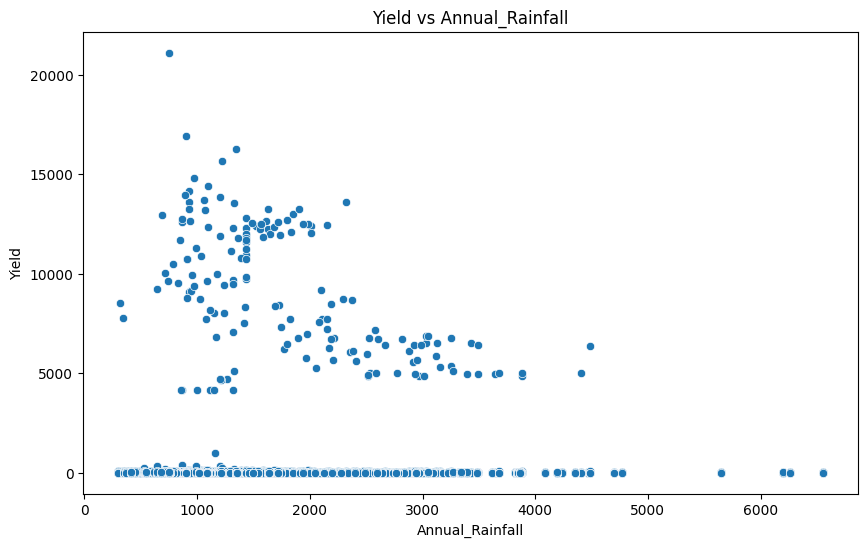

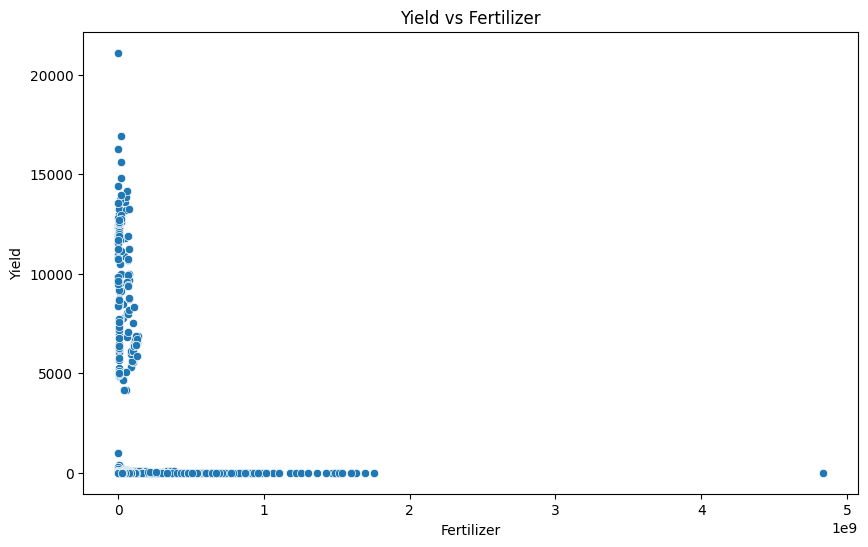

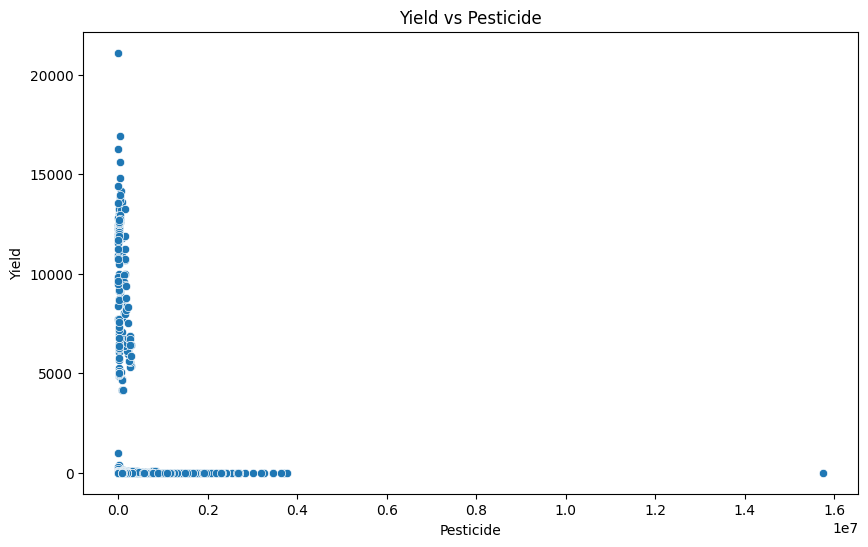

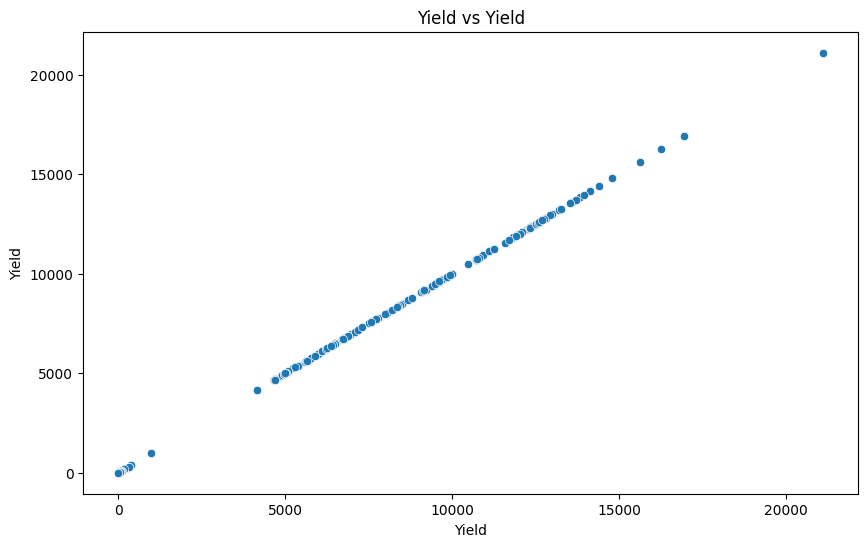

In [ ]:
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[col], y=df["Yield"])
    plt.title(f"Yield vs {col}")
    plt.show()

No kernel connected